In [15]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy.signal import tukey


datapath=""

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'

#---code path
import sys
sys.path.append("E:\ROMS学习\download_data_process\submeso\Rocha\pyspec\pyspec")
sys.path.append("E:\ROMS学习\download_data_process\submeso\analysis\taiwan")
import helmholtz as hel

#-------当前路径
import os
a=os.getcwd()
b="当前路径"

mat=sio.loadmat('ADCPzsm.mat')

In [16]:
ucross_AB1=mat['uacross_AB1']
ualong_AB1=mat['ualong_AB1']
ucross_CD1=mat['uacross_CD1']
ualong_CD1=mat['ualong_CD1']

In [17]:
print(ucross_AB1.shape + ucross_CD1.shape)
layer=np.arange(20,81)
# layer=np.arange(20,61)

(111, 434, 111, 387)


In [18]:
ucross_AB2=np.nanmean(ucross_AB1[layer,:],0)
ualong_AB2=np.nanmean(ualong_AB1[layer,:],0)
ucross_CD2=np.nanmean(ucross_CD1[layer,:],0)
ualong_CD2=np.nanmean(ualong_CD1[layer,:],0)



In [19]:
#认为v是沿轨
#L=np.linspace(250,200000,400)

#-----------fftshift的频率分布
#[0:N/2-1 -N/2:-1]
x=np.linspace(0,38600,387);
Cu=np.fft.fft(ucross_CD2*tukey(387,1))
Cv=np.fft.fft(ualong_CD2*tukey(387,1))
Cu1=np.fft.fftshift(np.abs(Cu))
Cv1=np.fft.fftshift(np.abs(Cv))
Cu2=Cu1[193:]
Cv2=Cv1[193:]


#------------------------频率分布
N=387
freqs = np.fft.fftfreq(len(ucross_CD2), 100)
k2=freqs[0:194]

Cpsiu,Cphiu=hel.spec_helm_decomp(k2,Cv2,Cu2)

C:\Users\36197\AppData\Local\Temp\ipykernel_45140\3801313162.py:7: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  Cu=np.fft.fft(ucross_CD2*tukey(387,1))
C:\Users\36197\AppData\Local\Temp\ipykernel_45140\3801313162.py:8: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  Cv=np.fft.fft(ualong_CD2*tukey(387,1))
D:\LIN2023\taiwan\helmholtz.py:42: RuntimeWarning: divide by zero encountered in log
  s = np.log(k)
D:\LIN2023\taiwan\helmholtz.py:59: RuntimeWarning: invalid value encountered in subtract
  sh = sinh(s[i]-s[i:])
D:\LIN2023\taiwan\helmholtz.py:60: RuntimeWarning: invalid value encountered in subtract
  ch = cosh(s[i]-s[i:])
D:\LIN2023\taiwan\helmholtz.p

C:\Users\36197\AppData\Local\Temp\ipykernel_45140\2195743731.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  ax2.loglog(k2,Cphiu/2.,'g',color=color4,linewidth=lw,\


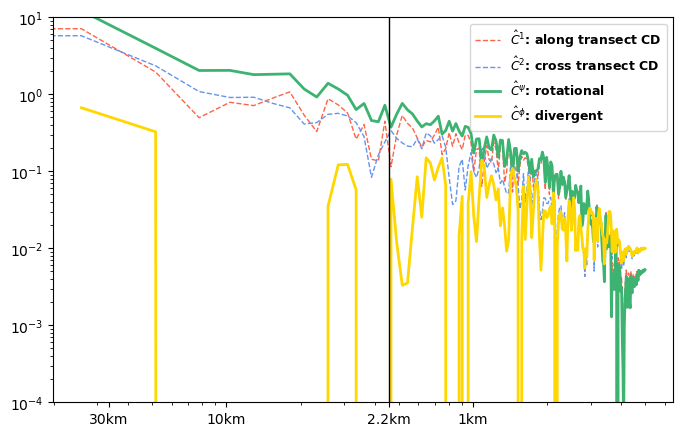

In [20]:
# fig=plt.figure()
# ax2 = fig.add_subplot(122)
fig, ax2 = plt.subplots(figsize=(8, 5))  # 设置图像大小为宽8英寸，高5英寸

lw=1.
ax2.loglog(k2,Cv2/2,color=color1,linewidth=lw,\
          label=r'$\hat{C}^1$: along transect CD',\
          linestyle='--')
ax2.loglog(k2,Cu2/2,color=color2,linewidth=lw,\
          label=r'$\hat{C}^2$: cross transect CD',\
          linestyle='--')

lw=2
ax2.loglog(k2,Cpsiu/2.,color=color3,linewidth=lw,\
           label=r'$\hat{C}^\psi$: rotational')
ax2.loglog(k2,Cphiu/2.,'g',color=color4,linewidth=lw,\
           label=r'$\hat{C}^\phi$: divergent')
ax2.plot([1/2200,1/2200],[10**-4,10**1],color='k',linewidth=1)
ax2.set_ylim([10**-4,10**1])
ax2.set_xticks([1/(10**3),1/2200,1/(10*10**3),1/(30*10**3)])
ax2.set_xticklabels(["1km","2.2km","10km","30km"])


lg=ax2.legend(loc=1,fontsize=9)
for text in lg.texts:
    text.set_weight('bold')
plt.savefig('1dhelmoholtz_CD.png', dpi=300)

In [21]:
#认为v是沿轨
#L=np.linspace(250,200000,400)

#-----------fftshift的频率分布
#[0:N/2-1 -N/2:-1]
x=np.linspace(0,43300,434);
Cu=np.fft.fft(ucross_AB2*tukey(434,1))
Cv=np.fft.fft(ualong_AB2*tukey(434,1))
Cu1=np.fft.fftshift(np.abs(Cu))
Cv1=np.fft.fftshift(np.abs(Cv))
Cu2=Cu1[217:]
Cv2=Cv1[217:]


#------------------------频率分布
N=434
freqs = np.fft.fftfreq(len(ucross_AB2), 100)
k2=freqs[0:217]

Cpsiu,Cphiu=hel.spec_helm_decomp(k2,Cv2,Cu2)

C:\Users\36197\AppData\Local\Temp\ipykernel_45140\2154914733.py:7: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  Cu=np.fft.fft(ucross_AB2*tukey(434,1))
C:\Users\36197\AppData\Local\Temp\ipykernel_45140\2154914733.py:8: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  Cv=np.fft.fft(ualong_AB2*tukey(434,1))
D:\LIN2023\taiwan\helmholtz.py:42: RuntimeWarning: divide by zero encountered in log
  s = np.log(k)
D:\LIN2023\taiwan\helmholtz.py:59: RuntimeWarning: invalid value encountered in subtract
  sh = sinh(s[i]-s[i:])
D:\LIN2023\taiwan\helmholtz.py:60: RuntimeWarning: invalid value encountered in subtract
  ch = cosh(s[i]-s[i:])
D:\LIN2023\taiwan\helmholtz.p

C:\Users\36197\AppData\Local\Temp\ipykernel_45140\1321533501.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  ax2.loglog(k2,Cphiu/2.,'g',color=color4,linewidth=lw,\


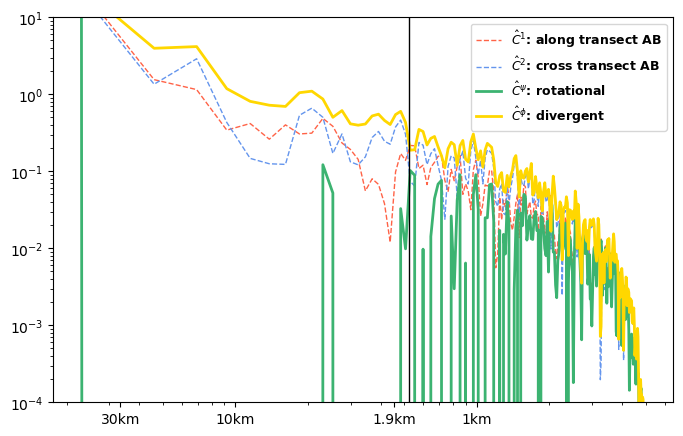

In [22]:
# fig=plt.figure()
# ax2 = fig.add_subplot(122)
fig, ax2 = plt.subplots(figsize=(8, 5))  # 设置图像大小为宽8英寸，高5英寸

lw=1.
ax2.loglog(k2,Cv2/2,color=color1,linewidth=lw,\
          label=r'$\hat{C}^1$: along transect AB',\
          linestyle='--')
ax2.loglog(k2,Cu2/2,color=color2,linewidth=lw,\
          label=r'$\hat{C}^2$: cross transect AB',\
          linestyle='--')

lw=2
ax2.loglog(k2,Cpsiu/2.,color=color3,linewidth=lw,\
           label=r'$\hat{C}^\psi$: rotational')
ax2.loglog(k2,Cphiu/2.,'g',color=color4,linewidth=lw,\
           label=r'$\hat{C}^\phi$: divergent')
ax2.plot([1/1900,1/1900],[10**-4,10**1],color='k',linewidth=1)
ax2.set_ylim([10**-4,10**1])
ax2.set_xticks([1/(10**3),1/2200,1/(10*10**3),1/(30*10**3)])
ax2.set_xticklabels(["1km","1.9km","10km","30km"])


lg=ax2.legend(loc=1,fontsize=9)
for text in lg.texts:
    text.set_weight('bold')
plt.savefig('1dhelmoholtz_AB.png', dpi=300)